In [ ]:
# HW 3

[[2.         3.        ]
 [1.95       2.8       ]
 [1.895      2.6175    ]
 [1.836375   2.4505    ]
 [1.7752625  2.29726875]
 [1.71259969 2.156305  ]
 [1.64915497 2.02630448]
 [1.5855547  1.90613178]
 [1.52230582 1.79479634]
 [1.45981505 1.691432  ]
 [1.39840515 1.59527955]
 [1.33832861 1.50567185]
 [1.27977934 1.4220211 ]
 [1.22290246 1.34380795]
 [1.16780261 1.27057228]
 [1.11455097 1.20190518]
 [1.06319113 1.13744221]
 [1.01374413 1.07685755]
 [0.96621259 1.019859  ]
 [0.92058428 0.96618373]]


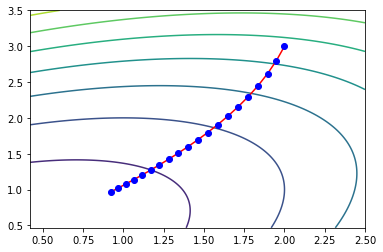

In [3]:
import numpy
import matplotlib
from matplotlib import pyplot

# define the functions we're interested in, along with their gradients
def f1(alpha):
    x, y = alpha[0], alpha[1]
    return (x - y)**2 + x*y


def grad_f1(alpha):
    x, y = alpha[0], alpha[1]
    return numpy.array([2*x - y, -x + 2*y])


def f2(alpha):
    x, y = alpha[0], alpha[1]
    return (1 - (y - 4))**2 + 35 * ((x + 6) - (y - 4)**2)**2


def grad_f2(alpha):
    x, y = alpha[0], alpha[1]
    return numpy.array([
        -70*y**2 + 70*x + 560*y - 700,
        140*y**3 - 140*x*y - 1680*y**2 + 560*x + 5882*y - 5610,
    ])


# define the gradient descent algorithm
def grad_descent(num_iter, alpha, gamma, grad):
    values = numpy.zeros([num_iter, len(alpha)])
    values[0,:] = alpha
    for i in range(1, num_iter):
        alpha = alpha - gamma * grad(alpha)
        values[i,:] = alpha
    
    return values


# define a helper function that creates the contour lines
def create_contour_lines(values, f):
    min_x, max_x = min(values[:,0]), max(values[:,0])
    min_y, max_y = min(values[:,1]), max(values[:,1])
    x, y = numpy.meshgrid(numpy.linspace(min_x - .5, max_x + .5, 1729),
                          numpy.linspace(min_y - .5, max_y + .5, 1729))
    z = f(numpy.array([x, y]))
    pyplot.contour(x, y, z)


## Part (a)


# define the starting location and the learning rate
alpha = numpy.array([2, 3])
gamma = .05

# run the gradient descent algorithm
values = grad_descent(20, alpha, gamma, grad_f1)
print(values)



# plot the results
create_contour_lines(values, f1)
pyplot.plot(values[:,0], values[:,1], 'r-')
pyplot.plot(values[:,0], values[:,1], 'bo')





In [46]:
## Part (c)

best_gamma = -1
best_norm = 2e9
for gamma in numpy.linspace(.510810883, .510811885, 1001):
    values = grad_descent(20, alpha, gamma, grad_f1)
    norm = numpy.linalg.norm(values[-1,], 1)
    if norm < best_norm:
        best_norm = norm
        best_gamma = gamma

print(best_gamma, best_norm)

0.510810884002 6.295481364980884e-06


[[  2.           3.        ]
 [  1.25         0.        ]
 [ -0.625        0.9375    ]
 [  1.015625    -0.9375    ]
 [ -1.2109375    1.23046875]
 [  1.52832031  -1.5234375 ]
 [ -1.90673828   1.90795898]
 [  2.38433838  -2.3840332 ]
 [ -2.98019409   2.98027039]
 [  3.72529984  -3.72528076]
 [ -4.65661049   4.65661526]
 [  5.82076669  -5.8207655 ]
 [ -7.27595747   7.27595776]
 [  9.09494705  -9.09494698]
 [-11.36868376  11.36868378]
 [ 14.21085472 -14.21085471]
 [-17.76356839  17.76356839]
 [ 22.20446049 -22.20446049]
 [-27.75557562  27.75557562]
 [ 34.69446952 -34.69446952]]
grad_of_last_value: [ 104.08340856 -104.08340856]


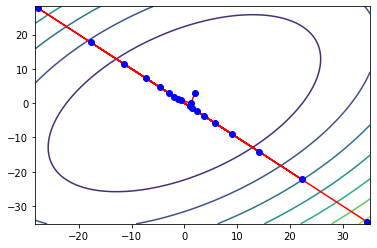

In [19]:


gamma = .75

# run the gradient descent algorithm
values = grad_descent(20, alpha, gamma, grad_f1)
print(values)



# plot the results
create_contour_lines(values, f1)
pyplot.plot(values[:,0], values[:,1], 'r-')
pyplot.plot(values[:,0], values[:,1], 'bo')

print(f"grad_of_last_value: {grad_f1(values[-1,:])}")

In [ ]:
## Part (b)


# define the starting location and the learning rate
alpha = numpy.array([0, 2])
gamma = .0015

# run the gradient descent algorithm
values = grad_descent(100, alpha, gamma, grad_f2)
print(values)



# plot the results
create_contour_lines(values, f2)
pyplot.plot(values[:,0], values[:,1], 'r-')
pyplot.plot(values[:,0], values[:,1], 'bo')

In [ ]:
# HW 1

In [1]:
import numpy as np
from scipy.stats import rayleigh
import matplotlib.pyplot as plt

In [2]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [3]:
x = np.linspace(-2, 4, 1729) # create 1729 data points evenly distr within [-2, 4]
print(len(x))
print(x)

1729
[-2.         -1.99652778 -1.99305556 ...  3.99305556  3.99652778
  4.        ]


In [4]:
help(rayleigh.pdf)
help(rayleigh.cdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.rayleigh_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.rayleigh_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The 

In [5]:
pdf_x = rayleigh.pdf(x)
cdf_x = rayleigh.cdf(x)

In [6]:
help(plt.plot)
help(plt.figure)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

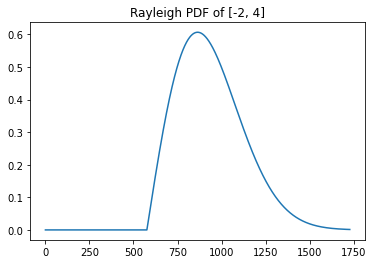

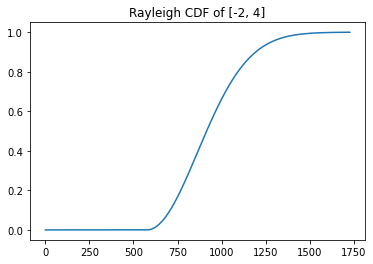

In [7]:
plt.figure()
plt.title("Rayleigh PDF of [-2, 4]")
plt.plot(pdf_x)
plt.figure()
plt.title("Rayleigh CDF of [-2, 4]")
plt.plot(cdf_x)